# 

# Day 2 am: Regression and formula-based models

## Regression

Recall from the previous session that one of the advantages of Bayesian
statistical inference—aka using a sample to answer questions about a
population in the form of probability statements—is that probability
functions decompose into the following convenient form:

$$
p(d, \theta) \propto p(\theta)p(d\mid\theta)
$$

In particular, we mentioned that the form $p(d\mid\theta)$ is convenient
for representing data generating processes.

Regression is the main way to flesh out this idea: it provides specific
ways to say, for data $d$ and parameters $\theta$, what is the
likelihood $p(d\mid\theta)$.

The key idea of regression is to model the situation where the data $d$
naturally come in pairs, so that $d_i = (x_i, y_i)$. The first variables
$x$ are called “covariates”, or “independent” variables, and the
variables $y$ are typically called “variates” or “dependent variables”.
The variates represent things that are measured in an experiment and the
covariates things that can predict the measurements.

With this split made, the next step in regression modelling is to define
a way to turn the covariates into a summary statistic, then connect this
statistic probabilistically with $y$. In mathematical notation, this
means that a regression model has this form:

$$
p(d\mid\theta) = p(y\mid T(x, \theta), \theta)
$$

where $T$ is a deterministic function that maps any $x$ and $\theta$ to
a summary statistic.

A popular approach, which we will concentrate on in this course, is for
the summary statistic $T(x, \theta)=\hat{y}(x, \theta)$ to be an
estimate of the most likely, or “expected”, value of $y$. Alternatively,
in [quantile
regression](https://en.wikipedia.org/wiki/Quantile_regression) the
summary statistic estimates an extreme value of $y$.

Formulating $p(d\mid\theta)$ up in this way allows a regression modeller
to separately create a deterministic model of the underlying process and
a probabilistic model of the measurement process. This separation is
very convenient!

Being able to choose any deterministic function $T$ to represent the
relationship between $x$, $\theta$ and $y$ allows the modeller a lot of
freedom to represent domain knowledge. For example, $T$ might encode a
kinetic model connecting experimental conditions with things we can
measure in a bioreactor.

On the other hand, writing down a function
$p(y\mid T(x, \theta), \theta)$ is often easier than directly specifying
a likelihood function $p(d\mid\theta)$. The former, regression-based
formulation is natural for representing how noisy measurements work. For
example, regression models often represent measurements using the normal
distribution:

$$
\begin{align*}
\theta &= \theta_1, ..., \theta_k, \sigma \\
T(x, \theta) &= T(x, \theta_1, ..., \theta_k) = \hat{y}\\
p(y\mid T(x, \theta), \theta) &= N(y\mid \hat{y}, \sigma)
\end{align*}
$$

In this equation $N$ indicates the normal probability density function:

$$
N(y\mid\hat{y},\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{-\frac{(y-\hat{y})^2}{2\sigma^2}}
$$

To get an intuition for why this makes sense as a way to represent a
measurement, consider the following plot of this function:

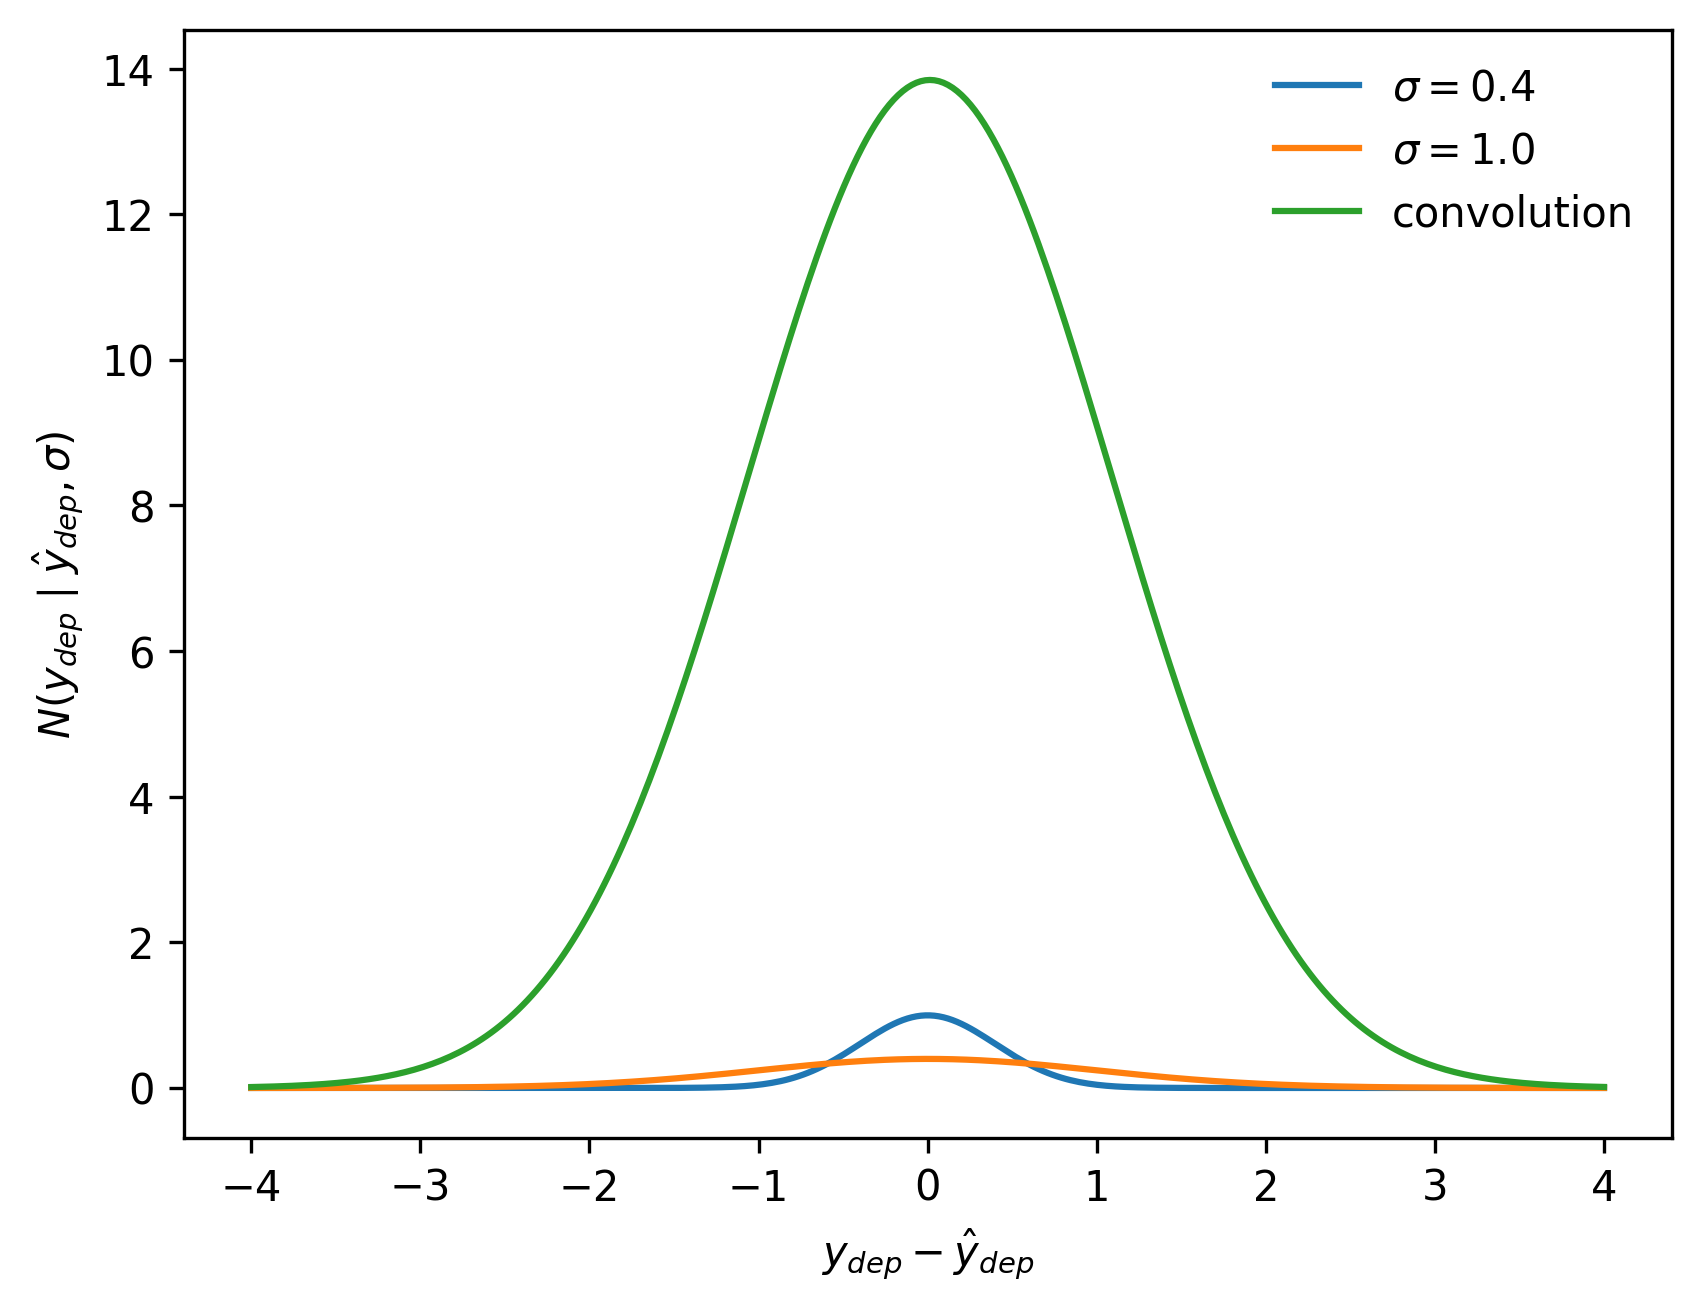

Note that, as we usually expect for a measurement, the density is
highest when the measured and expected values are the same, and smoothly
and symmetrically decreases with this distance. The accuracy of the
measurement can be captured by the parameter $\sigma$, as shown by
comparing the blue and orange lines.

### Representing measurements using probability distributions

Here are some rules of thumb for representing measurements using
probability distributions.

The most important thing is to consider are natural constraints: where
does the measurement *have* to live?

#### Unconstrained measurements

If both measureable and measurement can in principle live on any the
real line, the Normal regression model presented above is usually a good
starting point. Many standard statistical methods explicitly or
implicitly assume such a model.

If your unconstrained measurements come in batches, consider whether
they are likely to be correlated, so that the value of one batch
component could be informative about the value of another. If so, you
may want to use a [multivariate normal
distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)
to model your measurements.

If, as happens quite often, your unconstrained measurements potentially
include outliers, they may be better described using a measurement
distribution with heavier tails than the normal distribution, such as
the [student-T
distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

If your unconstrained measurements are skewed, so that errors in one
direction are more likely than the other, consider modelling them with a
[skew-normal
distribution](https://en.wikipedia.org/wiki/Skew_normal_distribution).

#### Non-negative measurements

We often want to measure things that cannot possibly be negative, like
concentrations or temperatures. This kind of measurement is often
**not** well described by the normal distribution.

First, note that the normal distribution has support across the whole
real number line, half of which is inaccessible to a non-negative
measurement. Modelling non-negative measurements using the normal
distribution therefore necessarily involves allocating probability mass
to something structurally impossible. How big of a problem this is in
practice depends on the amount of probability mass misallocated: this in
turn depends on the distance in measurement standard deviations from
$\hat{y}$ to zero. As a general rule of thumb, if this distance is less
than 3 standard deviations for any measurement, there is a potential
problem.

Second, note that the normal probability density function is
symmetrical: the density decreases at the same rate both up and down
from $y-\hat{y}=0$. This behaviour is desirable when an error gets less
likely proportionally to its absolute size. However non-negative
measurement errors are often naturally expressed relatively, not
absolutely. If you usually talk about your errors in terms like “+/-
10%” or similar, an unconstrained probability distribution is probably a
bad fit.

For these reasons, when modelling non-negative measurements, it is often
a good idea to use a probability distribution whose support lies only on
the non-negative real line. This can often easily be done by
log-transforming the measurements and then using an unconstrained
measurement distribution centred at the logarithm of $\hat{y}$.

#### Measurements that live in the interval \[-1, 1\]

Try transforming the measurements to unconstrained space using the
inverse hyperbolic tangent function.

#### Counts

Use the poisson distribution.

#### Ranks

Try the rank-ordered logit distribution. Good luck!

#### Compositions

This is a whole area of statistics, but you can get a long way by
transforming compositional measurements to unconstrained space using a
[log-ratio
function](https://en.wikipedia.org/wiki/Compositional_data#Linear_transformations).

### Representing domain knowledge using linear models

In a regression model the function $T(x, \theta)$ encodes the modeller’s
knowledge about how the measurement targets depend on the covariates and
parameters. The simplest, and by far most common, way to do this is with
a linear model.

A linear model assumes that the expected value of the measurable,
i.e. $\hat{y}$, depends on a weighted sum of the covariates $x$. For
example, we might have

$$
\hat{y} = x\beta
$$

Where $\beta$ is a vector of weights.

Note that this formulation allows for an intercept, i.e. a weight that
applies to all measurements, via inclusion of a dummy variable in $x$
whose value is 1 for all measurements.

To accommodate constrained measurement models without changing the
approach too much, linear models often add a “link” function that
transforms the unconstrained term $x\beta$ to match the constrained term
$\hat{y}$. Models with this form are called “generalised linear models”
or “GLM”s. For example, here is a poisson GLM for describing count data,
where the link function is the natural logarithm:

$$
\begin{align*}
\ln(\hat{y}) &= x\beta \\
y &\sim Poisson(\hat{y})
\end{align*}
$$

Note the use of the operator $\sim$ here. It can be interpreted as
saying that the variable on the left “has” the probability distribution
on the right. In other words it is a shorthand for this kind of
statement about a probability function:

$$
A \sim N(\mu, \sigma) \iff p(A=a\mid \mu, \sigma) = N(a\mid \mu, \sigma)
$$

#### Don’t forget to transform the covariates!

Linear models have a lot of hidden flexibility, as the modeller is free
to transform the covariates any way they like. You can and should make
the most of this freedom. In particular, consider log-transforming any
positive-constrained covariates: this effectively creates a
multiplicative rather than additive effect, which is often what you
want.

#### Hierarchical models

Often there are systematic differences between different groups of data
points. For example, measurements that are biological replicates are
likely to be similar. Regression models can capture this kind of
difference by adding more weight parameters: instead of one weight per
covariate, we can use one weight per covariate, per group. Adding
parameters in this way has the downside that there are fewer
measurements per parameter, potentially dramatically increasing the
number of experiments required to get reliable estimates.

Hierarchical regression models provide a clever solution to this
dilemma, by adding even more parameters that flexibly regularise the
other parameters. For example, suppose we have the following model for a
measurement from replicate $r$:

$$
\begin{align*}
\hat{y} &= \ln(\beta_{r}) \\
y &\sim Poisson(\hat{y})
\end{align*}
$$

To regularise the $\beta$ parameters in this model, we can add the
following hierarchical component:

$$
\beta \sim N(\mu_{\beta}, \tau_{\beta})
$$

Models with this structure are called “hierarchical” because they
include “hyper-parameters” like $\mu_{\beta}$ and $\tau_{\beta}$ that
control other parameters.

Note that in this model the hyper-parameter $\tau_{\beta}$ controls how
likely it is, according for the model, for the bottom-level parameters
$\beta$ to differ from $\mu_{\beta}$. The smaller $\tau_{\beta}$ is, the
more model penalises these differences. In this way, the model is
flexible, able to capture both strong and weak similarity between
same-replicate measurements.

In a Bayesian hierarchical model, the prior model can provide further
regularisation for both hyper-parameters and bottom-level parameters,
allowing the modeller to

## Formula-based models

Wilkinson notation, introduced in 1973 (Wilkinson and Rogers 1973),
provides a convenient and very succinct way of expressing linear models
in just a few characters, using short formulae like `y ~ x1 + x2`.

The idea with a formula-based models is for the `~` symbol to separate
the variates on the left from the covariates on the right, and for the
right hand side to succinctly express how to get $\hat{y}$ from the
covariates.

Wilkinson-style formulae can be surprisingly expressive. In particular,
hierarchical models can be expressed by including categorical variables
in the formula and using a `|` symbol. For example, in the Python
library
[formulae](https://bambinos.github.io/formulae/notebooks/getting_started.html#Group-specific-effects)
the formula `y ~ x + (1|g)` expresses a hierarchical linear model where
the expected value of `y` depends on a real-valued covariate `x` and a
categorical variable `g`, with the dependency captured by an additive
term `(1|g)`, sometimes called a “random intercept”.

Libraries like [bambi](https://bambinos.github.io/bambi/) and its R
counterpart [brms](https://paulbuerkner.com/brms/) provide ergonomic
interfaces for specifying and fitting Bayesian statistical models with
the help of Wilkinson-style formulae. In the next session we will try
using bambi.

### When and when not to use formula-based models

Formula-based modelling is a great fit for a wide Bayesian data
analyses, provided that the data comes in tabular format. They don’t
work so well when the data is hard to squeeze into a single table.

Wilkinson, G. N., and C. E. Rogers. 1973. “Symbolic Description of
Factorial Models for Analysis of Variance.” *Journal of the Royal
Statistical Society. Series C (Applied Statistics)* 22 (3): 392–99.
<https://doi.org/10.2307/2346786>.